In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import patsy
import statsmodels.api as sm
from matplotlib import rcParams
import scipy as sp



In [ ]:
# To download the file the easiest way, use gdown
!pip install gdown --upgrade
!gdown 1y45yzT-tIdWks-sv79BoiyQhMwN4pUGA
!unzip housing.csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1y45yzT-tIdWks-sv79BoiyQhMwN4pUGA
To: /content/housing.csv.zip
100% 111M/111M [00:01<00:00, 105MB/s]
Archive:  housing.csv.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: housing.csv             


In [ ]:
#import data file
df_origin = pd.read_csv("housing.csv")

#clean up with necessary column only
df = df_origin.drop(columns = ["id", "url", "region_url", "image_url"])
df

#limit the region into california only.
df = df[df["state"] == "ca"]
df.drop(columns = ["state"],inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,Ridgeview by Vintage is where you will find al...,39.5483,-119.796
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,Conveniently located in the middle town of Ren...,39.5026,-119.789
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805


In [ ]:
df_origin.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [ ]:
df.isna().any()

region                     False
price                      False
type                       False
sqfeet                     False
beds                       False
baths                      False
cats_allowed               False
dogs_allowed               False
smoking_allowed            False
wheelchair_access          False
electric_vehicle_charge    False
comes_furnished            False
laundry_options             True
parking_options             True
description                False
lat                         True
long                        True
dtype: bool

In [ ]:
df.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

In [ ]:
df.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [ ]:
df["laundry_options"] = df.laundry_options.fillna('no laundry on site')

In [ ]:
df["parking_options"] = df.parking_options.fillna('no parking')

# Preliminary model, ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
X = df[["sqfeet","beds","baths","cats_allowed","dogs_allowed","smoking_allowed",
        "wheelchair_access","electric_vehicle_charge","comes_furnished","laundry_options","parking_options"]]

In [ ]:
y = df['price']

In [ ]:
X = enc.fit_transform(X)

In [ ]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(X,y)

Ridge()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(clf.predict(X), y)

17250708628.336975

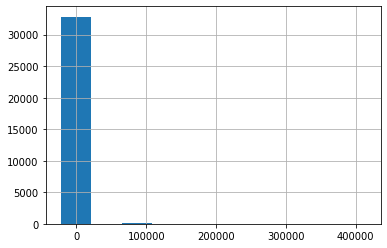

In [ ]:
pd.Series(clf.predict(X)).hist()

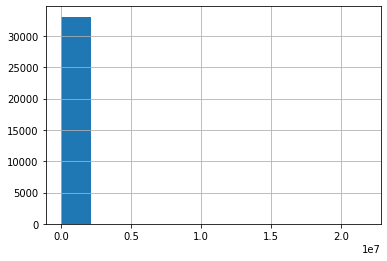

In [ ]:
y.hist()

#Filtered dataset

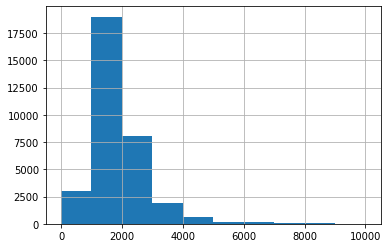

In [ ]:
df[df.price < 10000].price.hist()

In [ ]:
df_filter = df[df.price < 10000]

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
X = df_filter[["sqfeet","beds","baths","cats_allowed","dogs_allowed","smoking_allowed",
        "wheelchair_access","electric_vehicle_charge","comes_furnished","laundry_options","parking_options"]]

In [ ]:
y = df_filter['price']

In [ ]:
X = enc.fit_transform(X)

In [ ]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(X,y)

Ridge()

In [ ]:
mean_squared_error(clf.predict(X), y)

389593.3839076721

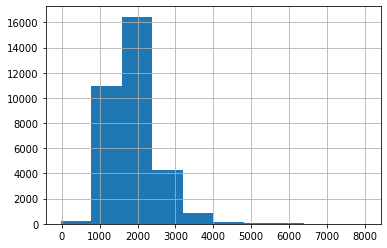

In [ ]:
pd.Series(clf.predict(X)).hist()

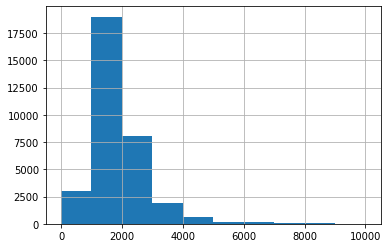

In [ ]:
y.hist()

# running with more features

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
X = df_filter.drop(columns=["price", "description", "lat", "long"])

In [ ]:
y = df_filter['price']

In [ ]:
X = enc.fit_transform(X)

In [ ]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(X,y)

Ridge()

In [ ]:
clf.predict(X)

array([1507.52837106, 1282.92477167, 1856.36589393, ...,  975.07499353,
       1557.83479262, 1387.71993674])

In [ ]:
mean_squared_error(clf.predict(X), y)

213402.8921494598

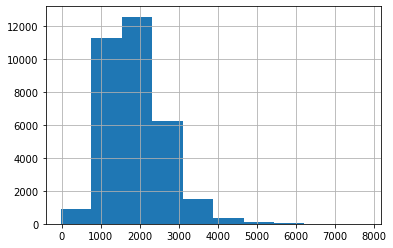

In [ ]:
pd.Series(clf.predict(X)).hist()

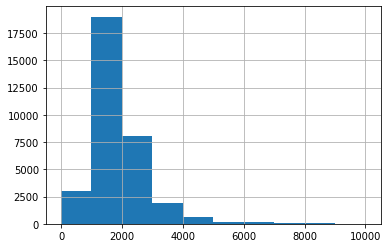

In [ ]:
y.hist()

In [ ]:
df_filter.price.mean()

1882.75676003028

# Lasso, fewer features should be more important

In [ ]:
from sklearn import linear_model

In [ ]:
las = linear_model.Lasso()

In [ ]:
las.fit(X,y)

Lasso()

In [ ]:
mean_squared_error(las.predict(X), y)

335475.7836761047

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(X_train,y_train)

Ridge()

In [ ]:
mean_squared_error(clf.predict(X_test), y_test)

292796.8547159887

# Bag of words

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df_filter.drop(columns=['lat', 'long', 'price'])
y = df_filter.price

In [ ]:
ct = ColumnTransformer(
     [("num_preprocess", OneHotEncoder(handle_unknown='ignore'), ['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options']),
     ("text_process", TfidfVectorizer(decode_error = "ignore"), 'description')])

In [ ]:
X = ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(X_train,y_train)

Ridge()

In [ ]:
mean_squared_error(clf.predict(X_test), y_test)

147470.63925507717

In [ ]:
clf.score(X_test, y_test)

0.8194133567707927

In [ ]:
las = linear_model.Lasso()

In [ ]:
las.fit(X_train,y_train)
mean_squared_error(las.predict(X_test), y_test)

305490.39085085463

In [ ]:
las.score(X_test, y_test)

0.6259086927323058

In [ ]:
lin = linear_model.Lasso(0.5)#linear_model.LinearRegression(fit_intercept = False, n_jobs=-1)

In [ ]:
lin.fit(X_train,y_train)
mean_squared_error(lin.predict(X_test), y_test)

275817.61203250545

In [ ]:
lin.score(X_test, y_test)

0.6622447902033413

# With cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
mod = Ridge()

In [ ]:
(10**np.arange(-4, 10).astype("float"))

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])

In [ ]:
param_dct = {"alpha":(np.arange(1, 5).astype("float")),
              "fit_intercept": [True,False]
              }
              #"solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]

In [ ]:
cv_results = GridSearchCV(mod, param_grid=param_dct,cv=3, scoring="neg_mean_squared_error")

In [ ]:
cv_results.fit(X,y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1., 2., 3., 4.]),
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
cv_results.best_score_

-392427.8045276234

# Region based models

In [ ]:
df_lst = []
for i in df_filter.region.unique():
  df_lst.append(df_filter[df_filter["region"] == i])

In [ ]:
def region_pred(df_reg):
  X = df_reg.drop(columns=['lat', 'long', 'price'])
  y = df_reg.price
  ct = ColumnTransformer(
      [("num_preprocess", OneHotEncoder(handle_unknown='ignore'), ['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
        'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
        'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
        'parking_options']),
      ("text_process", TfidfVectorizer(decode_error = "ignore"), 'description')])
  X = ct.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  clf = Ridge(alpha=1.0)
  clf.fit(X_train,y_train)
  return (clf, mean_squared_error(clf.predict(X_test), y_test), y.mean())

In [ ]:
models = []
mse_lst = []
real_mse = []
for i in df_lst:
  output = region_pred(i)
  models.append(output[0])
  mse_lst.append(output[1])
  real_mse.append((output[1])**(1/2)/output[2])

In [ ]:
pd.Series((dict(zip(df_filter.region.unique(),real_mse)))).sort_values()

hanford-corcoran    0.081094
stockton            0.115089
inland empire       0.116958
reno / tahoe        0.123548
bakersfield         0.129130
sacramento          0.142099
merced              0.142370
yuba-sutter         0.154206
fresno / madera     0.155274
santa maria         0.168217
gold country        0.175201
modesto             0.178107
santa barbara       0.184568
visalia-tulare      0.195560
ventura county      0.195991
los angeles         0.198121
monterey bay        0.198159
orange county       0.202502
san diego           0.202739
humboldt county     0.225128
SF bay area         0.230437
siskiyou county     0.249747
san luis obispo     0.268612
susanville          0.290535
redding             0.335857
chico               0.368906
palm springs        0.430967
mendocino county    0.712357
imperial county     0.730823
dtype: float64

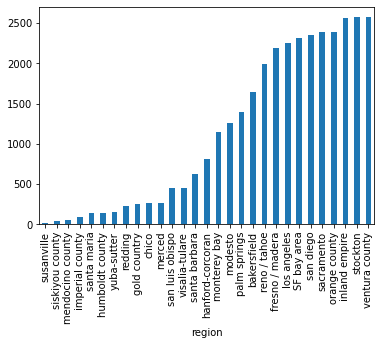

In [ ]:
df_filter.groupby("region").count()["price"].sort_values().plot(kind="bar")

In [ ]:
results_lst = df_filter.groupby("region").count()[["price"]].merge(
    pd.Series((dict(zip(df_filter.region.unique(),real_mse)))).sort_values().rename('correctness'), left_index=True, right_index=True)#.plot(kind="bar")

In [ ]:
results_lst.sort_values(by=["correctness", "price"], ascending=[True, False])

,price,correctness
hanford-corcoran,815,0.081094
stockton,2571,0.115089
inland empire,2560,0.116958
reno / tahoe,1990,0.123548
bakersfield,1644,0.129130
sacramento,2384,0.142099
merced,269,0.142370
yuba-sutter,152,0.154206
fresno / madera,2194,0.155274
santa maria,138,0.168217


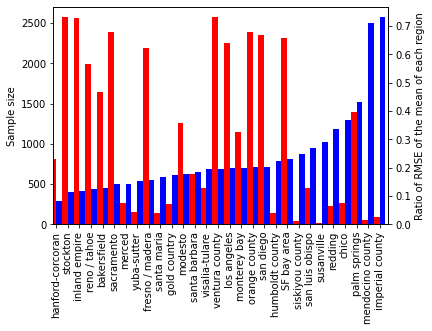

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

results_lst.sort_values(by=["correctness", "price"], ascending=[True, False]).price.plot(kind='bar', color='red', ax=ax, position=1)
results_lst.sort_values(by=["correctness", "price"], ascending=[True, False]).correctness.plot(kind='bar', color='blue', ax=ax2, position=0)

ax.set_ylabel('Sample size')
ax2.set_ylabel('Ratio of RMSE of the mean of each region')

plt.show()